**PLANT DISEASE DETECTION**






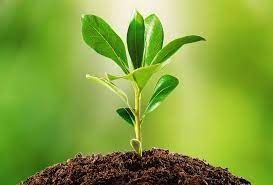

In [ ]:
#DATA SET LOADING

file_id='18DbC6Xj4NP-hLzI14WuMaAEyq482vNfn'
!gdown https://drive.google.com/uc?id={file_id}

!unzip -q PlantVillage.zip



Downloading...
From: https://drive.google.com/uc?id=18DbC6Xj4NP-hLzI14WuMaAEyq482vNfn
To: /content/PlantVillage.zip
866MB [00:07, 110MB/s]


In [ ]:
!python -m pip install numpy==1.18.0

     |████████████████████████████████| 20.1 MB 1.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.18.0 which is incompatible.
kapre 0.3.5 requires numpy>=1.18.5, but you have numpy 1.18.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import pickle
import cv2
import os
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation,Flatten,Dropout,Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
#IMAGE PREPROCESSING

DEFAULT_IMAGE_SIZE=tuple((256,256))

N_IMAGES=100

root_dir='./PlantVillage'

train_dir =os.path.join(root_dir,'train')
val_dir=os.path.join(root_dir,'val')



In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    plant_disease_folder_list = listdir(train_dir)

    for plant_disease_folder in plant_disease_folder_list :
       print(f"[INFO] Processing {plant_disease_folder} ...")
       plant_disease_image_list=listdir(f"{train_dir}/{plant_disease_folder}/")

       for image in plant_disease_image_list [:N_IMAGES]:
        image_directory = f"{train_dir}/{plant_disease_folder}/{image}"
        if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
          image_list.append(convert_image_to_array(image_directory))
          label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

#transform into numpy array
np_image_list=np.array(image_list,dtype=np.float16)/225.0
print()


#check number of images for training
image_len = len(image_list)
print(f"Total number of images:{image_len}")


[INFO] Loading images ...
[INFO] Processing Grape___healthy ...
[INFO] Processing Apple___Apple_scab ...
[INFO] Processing Corn_(maize)___healthy ...
[INFO] Processing Raspberry___healthy ...
[INFO] Processing Strawberry___Leaf_scorch ...
[INFO] Processing Peach___Bacterial_spot ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Apple___healthy ...
[INFO] Processing Blueberry___healthy ...
[INFO] Processing Peach___healthy ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Tomato___Spider_mites Two-spotted_spider_mite ...
[INFO] Processing Tomato___Tomato_mosaic_virus ...
[INFO] Processing Cherry_(including_sour)___Powdery_mildew ...
[INFO] Processing Tomato___Leaf_Mold ...
[INFO] Processing Pepper,_bell___healthy ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
[INFO] Processing Strawberry___healthy ...
[INFO] Processing Apple___Cedar_apple_rust ...
[INFO] Processing Squash___Powdery_mildew .

In [ ]:
label_binarizer=LabelBinarizer()
image_labels=label_binarizer.fit_transform(label_list)

pickle.dump(label_binarizer,open('plant_disease_label_transform.pkl','wb'))
n_classes=len(label_binarizer.classes_)

print("Total number of Classes:",n_classes)
print(label_binarizer.classes_)

Total number of Classes: 39
['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato__

In [ ]:
#SPLIT DATASET INTO TWO

print("[INFO] Splitting data to train and test...")

x_train ,x_test,y_train,y_test= train_test_split(np_image_list,image_labels,test_size=0.2,random_state=42)

[INFO] Splitting data to train and test...


In [ ]:
#DATA AUGMENTATION

#AugmentDATA

augment=ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True,
                             fill_mode="nearest")

In [ ]:
#HYPERPARAMETERS

EPOCHS=25
STEPS=100
LR=1e-3
BATCH_SIZE=32
WIDTH=256
HEIGHT=256
DEPTH=3

In [ ]:
#MODEL CREATION

model=Sequential()
inputShape=(HEIGHT,WIDTH,DEPTH)
chanDim=-1

if K.image_data_format()=='channels_first':
  inputShape=(HEIGHT,WIDTH,DEPTH)
  chanDim= 1

model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 85, 85, 64)        0

In [ ]:
#modeltraining

#initialize optimizer

opt = Adam(lr=LR, decay=LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

history=model.fit_generator(augment.flow(x_train,y_train,batch_size=BATCH_SIZE),
                            validation_data=(x_test,y_test),
                            steps_per_epoch=len(x_train)//BATCH_SIZE,
                            epochs=EPOCHS,
                            verbose=1)

[INFO] training network...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
97/97 [==============================] - 105s 561ms/step - loss: 0.7431 - accuracy: 0.0525 - val_loss: 0.2313 - val_accuracy: 0.0244
Epoch 2/25
97/97 [==============================] - 51s 527ms/step - loss: 0.1494 - accuracy: 0.1434 - val_loss: 0.1978 - val_accuracy: 0.0577
Epoch 3/25
97/97 [==============================] - 51s 524ms/step - loss: 0.1136 - accuracy: 0.2655 - val_loss: 0.1821 - val_accuracy: 0.0679
Epoch 4/25
97/97 [==============================] - 51s 523ms/step - loss: 0.0887 - accuracy: 0.4304 - val_loss: 0.1656 - val_accuracy: 0.1628
Epoch 5/25
97/97 [==============================] - 51s 529ms/step - loss: 0.0792 - accuracy: 0.4707 - val_loss: 0.3332 - val_accuracy: 0.2218
Epoch 6/25
97/97 [==============================] - 51s 522ms/step - loss: 0.0781 - accuracy: 0.4912 - val_loss: 0.4715 - val_accuracy: 0.1744
Epoch 7/25
97/97 [==============================] - 50s 517ms/step - loss: 0.0817 - accuracy: 0.4614 - val_loss: 0.0664 - val_accuracy: 0.512

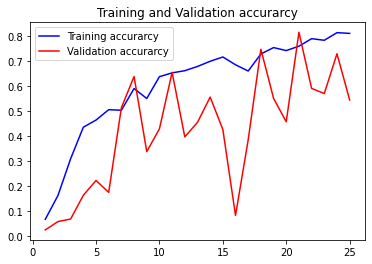

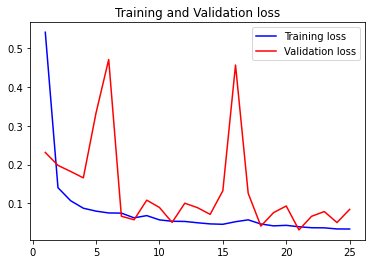

In [ ]:
#ACCURACY CALCULATION

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()




In [ ]:
#score evaluation
print("[INFO] Calculating model accuracy")
scores=model.evaluate(x_test,y_test)
print(f"Test Accuracy:{scores[1]*100}")


[INFO] Calculating model accuracy
25/25 [==============================] - 2s 59ms/step - loss: 0.0841 - accuracy: 0.5436
Test Accuracy:54.35897707939148


In [ ]:
# Dump pickle file of the model
print("[INFO] Saving model...")
pickle.dump(model,open('plant_disease_classification_model.pkl', 'wb'))

[INFO] Saving model...


TypeError: ignored

In [ ]:
print("[INFO] Saving label transform...")
filename = 'plant_disease_label_transform.pkl'
image_labels = pickle.load(open(filename, 'rb'))

[INFO] Saving label transform...


In [ ]:
#PREDICTION FUNCTION
def prediction(image_path):
    image_array = convert_image_to_array(image_path)
    np_image = np.array(image_array, dtype=np.float16) / 225.0
    np_image = np.expand_dims(np_image,0)
    plt.imshow(plt.imread(image_path))
    result = model.predict_classes(np_image)
    print((image_labels.classes_[result][0]))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


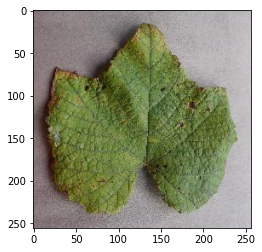

In [ ]:
prediction('/content/PlantVillage/val/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/01cdbd4c-bd3e-4277-8e84-60700397daaf___FAM_L.Blight 4755.JPG')

In [ ]:
#REUSE MODEL

from google.colab import drive
drive.mount('/content/drive')
#https://drive.google.com/file/d/1-xnlfJtx7wL2I0Bs_OQzRnRarP9YG39Q/view?usp=sharing
file_id='1-xnlfJtx7wL2I0Bs_OQzRnRarP9YG39Q'
!gdown https://drive.google.com/uc?id={file_id}

file_id='1TD97RUJrviN1PJfgpHq6BtR2b3V-2FIO'
!gdown https://drive.google.com/uc?id={file_id}


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Downloading...
From: https://drive.google.com/uc?id=1-xnlfJtx7wL2I0Bs_OQzRnRarP9YG39Q
To: /content/plant_disease_classification_model (1).pkl
233MB [00:01, 129MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TD97RUJrviN1PJfgpHq6BtR2b3V-2FIO
To: /content/plant_disease_label_transform.pkl
100% 8.18k/8.18k [00:00<00:00, 13.0MB/s]


In [ ]:
import numpy as np
import pickle
import cv2
import os
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation,Flatten,Dropout,Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
# Load model
filename = 'plant_disease_classification_model(1).pkl'
f=open('plant_disease_classification_model(1)','wb')
pickle.dump(dict,f)

# model = pickle.load(open(filename, 'rb'))

# Load labels
filename = 'plant_disease_label_transform.pkl'
image_labels = pickle.load(open(filename, 'rb'))

In [ ]:
# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((256, 256))

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

def prediction(image_path):
    image_array = convert_image_to_array(image_path)
    np_image = np.array(image_array, dtype=np.float16) / 225.0
    np_image = np.expand_dims(np_image,0)
    plt.imshow(plt.imread(image_path))
    result = model.predict_classes(np_image)
    print((image_labels.classes_[result][0]))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Apple___Apple_scab


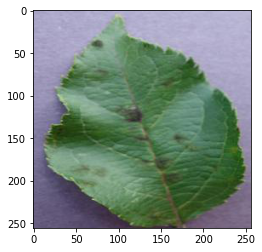

In [ ]:
prediction('/content/PlantVillage/val/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG')

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Pepper,_bell___Bacterial_spot


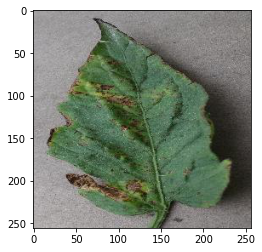

In [ ]:
prediction('/content/PlantVillage/val/Tomato___Bacterial_spot/00728f4d-83a0-49f1-87f8-374646fcda05___GCREC_Bact.Sp 6326.JPG')

Soybean___healthy


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


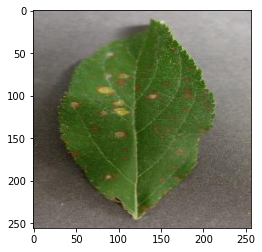

In [ ]:
prediction('/content/PlantVillage/val/Apple___Cedar_apple_rust/052e3deb-0499-4685-bc39-cea7f1df0700___FREC_C.Rust 3742.JPG')

Cherry_(including_sour)___Powdery_mildew


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


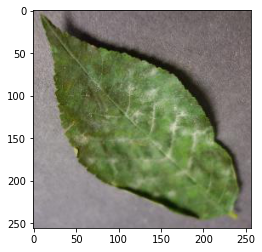

In [ ]:
prediction('/content/PlantVillage/val/Cherry_(including_sour)___Powdery_mildew/00e0a4ab-ecbd-4560-a71c-b19d86bb087c___FREC_Pwd.M 4917.JPG')